# Exploring Tweets data for monitoring Disaster using the exploratory data analysis (EDA) notebook

#### Introduction

This notebook is the first step in the DS4A Team 155 Project: Exploratory Data Analysis.
Social Networks have become a crucial communication channel in emergencies since users may report concerning situations in real-time. As a result, more agencies (i.e. disaster relief organizations and news agencies) are interested in monitoring Social Networks such as Twitter. However, tweets from people may or may not be actually realted to disasters. Therefore, machine learning models which predict real-time publication about emergencies and disasters are required.
From a set of different tweets, this project aims to predict which Tweets are about real disasters and which ones are not.


##### The proposed EDA approach to analysis the twitter messages is divided as follows: 
- Import the libraries
- Input Data
- Basic Informations
- Clean the data
- Feature Engineering
- Analizing Data
- Process Data
- Summary


### Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
import plotly
import re

from nltk.stem import PorterStemmer 
from pylab import rcParams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from collections import defaultdict
from nltk.util import ngrams
# Importing the required parameter for plotting 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [123]:
from xgboost import XGBClassifier

### Input Data

The data for this project includes 10876 tweets, divided into two different datasets: a train dataset (7613 tweets) and a test dataset (3263 tweets)
The datasets have the following columns:


The train dataset has the following columns:
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this feature denotes whether a tweet is about a real disaster (1) or not (0)


#### Train dataset

In [3]:
locations = pd.read_csv('Data/worldcities.csv')
locations = locations[["city", "country",'iso3']].astype(str)
locations['city']=locations['city'].str.lower()
locations['country']=locations['country'].str.lower()
locations


city      country iso3
0            tokyo        japan  JPN
1          jakarta    indonesia  IDN
2            delhi        india  IND
3           manila  philippines  PHL
4        são paulo       brazil  BRA
...            ...          ...  ...
42900       tukchi       russia  RUS
42901        numto       russia  RUS
42902         nord    greenland  GRL
42903  timmiarmiut    greenland  GRL
42904      nordvik       russia  RUS

[42905 rows x 3 columns]

In [4]:
df = pd.read_csv('Data/train.csv', dtype={'id': int, 'keyword': object, 'location': object, 'text': object, 'target': int})
df.head(5)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

#### Test dataset

The test dataset is the verification values ​​of the prediction model on disasters and does not have the target column in order to validate if the result of the model on the analyzed text is correct (validation of the tweet)

In [5]:
df_test = pd.read_csv('Data/test.csv', dtype={'id': int, 'keyword': object, 'location': object, 'text': object})
df_test.head(5)

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

### Basic Informations

 In this case we use the info() function to print a concise summary of a DataFrame.This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. For our case, we have 7613 rows and 5 columns. Location is the column with the most null values, followed by the Keywords column. Also, we can see that we have two data types: int32 and object.


In [6]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int32 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 238.0+ KB


The describe() method returns a description of the data in the df. If the df contains numerical data, the description contains: count, mean, std, min, percentiles (25%,50%,75%) and max columns. 

In [7]:
df.describe( )

id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000

In our DataFrame, we can find two numerical columns: id & target. For this case, we have complete information for the 7613 tweets (non null values). The mean of the target column is 0.42966, which means that most of the tweets do not correspond to a disaster (0: not disaster, 1: disaster), we can verify this information in the value counts function of the target column, that show us that we have 4342 with “0” target and 3271 with “1” target.

In [8]:
df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

With the function “df.isnull().sum()” we are adding the number of null values ​​that we have in each column. As we mentioned before, the column with the most null values is location with 2533 null values, followed by the Keyword column with 61 null values.


In [9]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

##### Observations

- There is a total of 7613 entries (train)
- There are numerous blanks in the dataset that need to be replaced with NA


### Clean Data

In the clean data part will be analyzed the characteristics of the information provided. This analysis is done based on the form of the data (uppercase, lowercase, etc.), the missing data, wrongly formatted data (for example, that in the text character cell it has a numeric data, they have special characters or links), the length of the tweet and how many words they have.


#### Removing rows, which own non-numerical values in the target column

In this part, we have a dataset that was classified by natural disaster based on a text provided by a tweet. To avoid having data that was not classified in the train part, we remove the data that has no classification with the .notnull() function.



In [10]:
df[pd.to_numeric(df['target'], errors='coerce').notnull()]

id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[7613 rows x 5 columns]

In the target column, a value other than 1 and 0 may have been entered during the classification stage. In this step, the dataset is filtered only by the values ​​that have a 1 and a 0 in the target.

#### Removing rows, which have not 1 and 0 values in target column


In the target column, a value other than 1 and 0 may have been entered during the classification stage. In this step, the dataset is filtered only by the values ​​that have a 1 and a 0 in the target. This step is done focused on the model of not having data that does not have a classification.



In [11]:
def is_valid_number(x):
    if x == 1 or x == 0:
        return True
    else:
        return True
df[df['target'].apply(lambda x: is_valid_number(x))]

id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[7613 rows x 5 columns]

#### Removing punctuations and numbers

In this part we will focus on the text column. Within this column, there is the tweet and it is sought to eliminate the punctuation marks and numbers, which add length to the text but do not add value to the message.


In [12]:
df['text_clean'] = df['text'].str.replace('[^\w\s]', '', regex=True).str.replace('\d+', '', regex=True)
df.head(5)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                         text_clean  
0       1  Our Deeds are the Reason of this earthquake Ma...  
1       1              Forest fire near La Ronge Sask Canada  
2       1  All residents asked to shelter in place are be...  
3       1   people receive wildfires evacuation orders in...  
4       1  Just got sent this photo from Ruby Alaska as s...

#### Removing uppercase

The characters have variations of uppercase and lowercase, but represent the same word. To avoid this situation, in this part of the code for the entire text column we convert the entire text string to lowercase using the "lower" function


In [13]:
df['text_clean']=df['text_clean'].apply(lambda x: x.lower())
df.head(5)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                         text_clean  
0       1  our deeds are the reason of this earthquake ma...  
1       1              forest fire near la ronge sask canada  
2       1  all residents asked to shelter in place are be...  
3       1   people receive wildfires evacuation orders in...  
4       1  just got sent this photo from ruby alaska as s...

#### Removing hyperlink

In this part we will focus on the text column. Within this column, there is the tweet and it is sought to eliminate hiperlink, which add length to the text but does not add value to the message. We use the regex library  and replace all the possible hyperlink 



In [14]:
df['text_clean']=df['text_clean'].apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x))
df.head(5)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                         text_clean  
0       1  our deeds are the reason of this earthquake ma...  
1       1              forest fire near la ronge sask canada  
2       1  all residents asked to shelter in place are be...  
3       1   people receive wildfires evacuation orders in...  
4       1  just got sent this photo from ruby alaska as s...

#### Removing square brackets

In this part we will focus on the text column. Within this column, there is the tweet and it is sought to eliminate the brackets, which add length to the text but does not add value to the message. We use the regex library  and replace all the possible hyperlink 


In [15]:
df['text_clean']=df['text_clean'].apply(lambda x:re.sub('\[.*?\]', '', x))
df['text_clean']=df['text_clean'].apply(lambda x:re.sub('<.*?>+', '', x))
df.head(5)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                         text_clean  
0       1  our deeds are the reason of this earthquake ma...  
1       1              forest fire near la ronge sask canada  
2       1  all residents asked to shelter in place are be...  
3       1   people receive wildfires evacuation orders in...  
4       1  just got sent this photo from ruby alaska as s...

### Feature Engineering

#### Counting the number of words

Using a lambda function, we split the text in the “text clean” column and count how many words there are in each tweet. For example, the tweet with id=1 has 13 words.


In [16]:
df['word_count'] = df['text_clean'].apply(lambda x: len(x.split()))
df.head(5)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                         text_clean  word_count  
0       1  our deeds are the reason of this earthquake ma...          13  
1       1              forest fire near la ronge sask canada           7  
2       1  all residents asked to shelter in place are be...          22  
3       1   people receive wildfires evacuation orders in...           7  
4       1  just got sent this photo from ruby alaska as s...          16

#### Adding the text length 

Similarly, we can calculate how many characters there are in each tweet, applying just the len(x) function. The tweet with id=1 has 68 characters:


In [17]:
df['size'] = df['text_clean'].apply(lambda x: len(x))
df.head(5)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                         text_clean  word_count  size  
0       1  our deeds are the reason of this earthquake ma...          13    68  
1       1              forest fire near la ronge sask canada           7    37  
2       1  all residents asked to shelter in place are be...          22   130  
3       1   people receive wildfires evacuation orders in...           7    58  
4       1  just got sent this photo from ruby alaska as s...          16    86

### Analizing Data

#### Number of Tweets with disasters (1) and non-disasters (0)

We can plot a bar graph to check how many tweets are disasters and how many are not. We take the target column to a new dataframe and plot the graph using seaborn:


<AxesSubplot:ylabel='target'>

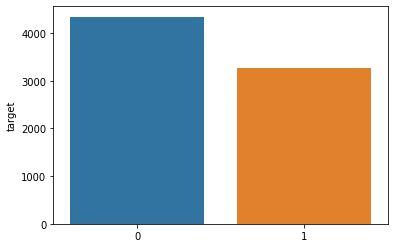

In [18]:
df_target = df['target'].value_counts().to_frame()

## seaborn barplot to display barchart
rcParams['figure.figsize'] = 5, 4
sns.barplot(data=df_target, x=df_target.index, y="target")

We can see that there are more non-disaster tweets (0).

#### Top twenty locations 

Although not every tweet has location information, we can investigate which cities or countries are more represented in the dataset. We calculate the value counts for the column “location” and plot the top 20 results in a bar graph.


<AxesSubplot:>

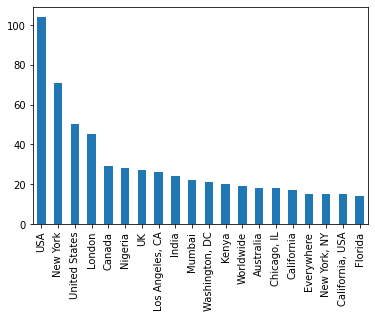

In [19]:
top_location = df["location"].value_counts().head(20)
top_location.plot(kind='bar')

The top locations are “USA”, “New York”, “United States” and “London”. Clearly, USA and United States refer to the same country, and New York is a city in that country. Therefore, it is a good idea to standardize the locations, specially the ones that refer to the same country (USA = United States). However, we will probably leave both cities and countries in our location column, as it is good to have location up to a city scale, even though some of the tweets have only the country and there is no way to find from which city they were written.

#### Histogram of the text size 

In the following histogram, we can see the distribution of the length (characters) of the tweets, which is left-skewed. As expected, there are very few short tweets, and most of them have approximately 120 characters. The maximum number of characters is 140, and therefore we can deduce that this dataset has tweets that were sent before november 2017, when twitter decided to double the character limit from 140 to 280 characters.  

<AxesSubplot:>

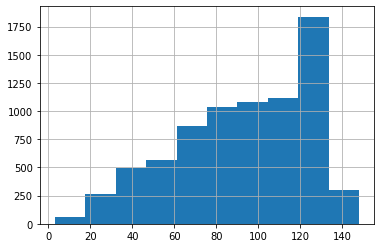

In [20]:
df['size'].hist()

#### Histogram of the number words

Conversely, the following histogram of the amount of words in the tweets is relatively symmetric, although it has a bit of a longer right tail. We can see that most tweets have between 10 and 18 words.

<AxesSubplot:>

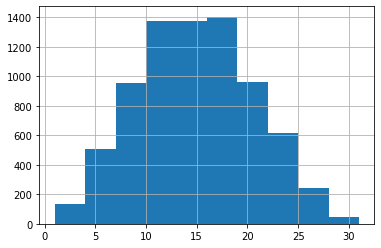

In [21]:
df['word_count'].hist()

#### Histogram of the average word length

Finally, we plot a histogram of the average word length in each tweet. We can see that it is a right-skewed distribution and that the average word length in most tweets is 5 to 6 characters. 


<AxesSubplot:>

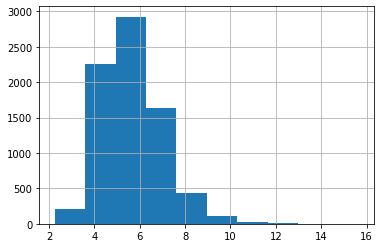

In [22]:
df['text_clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

### Process data

#### Word tokenization

In [23]:
AllReviews = df['text_clean']
AllReviews.head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text_clean, dtype: object

In [24]:
review_words_lengths = AllReviews.apply(lambda x: len(nltk.word_tokenize(x)))

#### Sentences with two words

In [25]:
AllReviews[review_words_lengths[review_words_lengths == 2].index].head(5)

22                       love skiing
30                           the end
113    aftershock httpstcoxmwodfmtui
131      aftershock httpstcojvppkhjy
276                apocalypse please
Name: text_clean, dtype: object

#### Max and min values in the number of words

In [26]:
print("Minimun number of words", min(review_words_lengths))
print("Maximum number of words", max(review_words_lengths))

Minimun number of words 1
Maximum number of words 31


#### Histogram of the tokenization words

<AxesSubplot:>

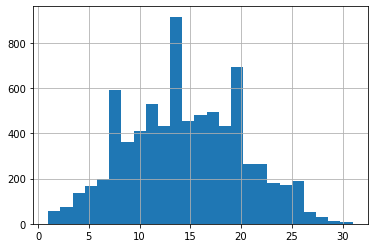

In [27]:
## Setting the resolution for better clarity 
review_words_lengths.hist(bins = 25)

The results of the tokenization process show that there is a significant concentration in the groups of tweets that have a number of words between 10 and 20 words. Being the lengths of 13 and 14 where the majority of the tweets are found, with more than 1000 records only in those two lengths. In general terms, it could be said that most of the tweets don’t really correspond to natural disasters, because in the middle of an emergency there is not enough time to write a very long tweet.

#### Histogram of the tokenization words for disaster

<AxesSubplot:>

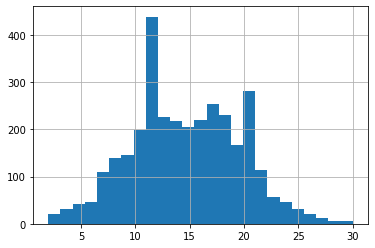

In [28]:
disaster = df[df.target == 1] 
Reviews_disaster = disaster['text_clean'] 
review_words_lengths_disaster = Reviews_disaster.apply(lambda x: len(nltk.word_tokenize(x)))
review_words_lengths_disaster.hist(bins = 25)

This histogram shows what was intuited in the analysis of the previous histogram. Analyzing only the tokenization of tweets that actually correspond to disasters, the distribution of most tweets leans towards shorter lengths than those shown in the histogram without the filtered data.

In conclusion, the precaution that must be taken when training the model must be taken into account, due to the little information that a tweet that corresponds to disaster can contain (remember that the stop words are generating noise when generating the histogram).
In the word cloud diagram that corresponds to positive tweets for disaster, it can be seen that there are keywords that indicate what may be the most recurrent disasters or events in the dataset, such as fires, landslides, terrorist attacks and accidents. Noise can also be evidenced in the data generated by the stop words.


#### Text visualization with word clouds

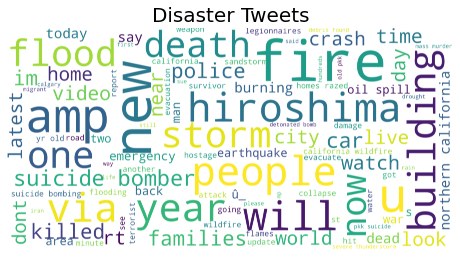

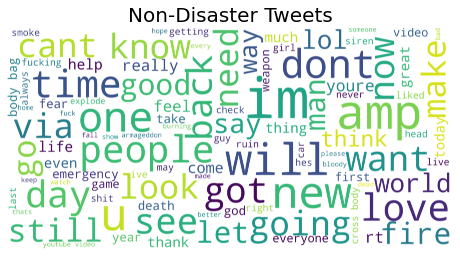

In [29]:
def word_cloud_rating(data, target_value, title, columna):
    
    data_filtered = data[data.target == target_value] #filtering according to the star value
    Reviews = data_filtered[columna]

    Reviews_text = ' '.join(Reviews.values) #joining all the words together

    # Creating a word cloud object
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",scale = 10,width=800, height=400).generate(Reviews_text)

    # Plotting the generated word cloud

    plt.figure(figsize=(8, 19))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title,fontsize=20);
    plt.axis("off")
    plt.show()
    
##### Filtering by target equal 1    
word_cloud_rating(df, 1, 'Disaster Tweets', "text_clean")

##### Filtering by target equal 0    
word_cloud_rating(df, 0, 'Non-Disaster Tweets', "text_clean")

 In the word cloud diagram that corresponds to positive tweets for disaster, it can be seen that there are keywords that indicate what may be the most recurrent disasters or events in the dataset, such as fires, landslides, terrorist attacks and accidents. Noise can also be evidenced in the data generated by the stop words.
As expected, in the tweets that are not related to disasters, there are no words that have a critical meaning or a disaster relationship, for instance, words like people, love, world and time are the most relevant.


#### Most common keywords

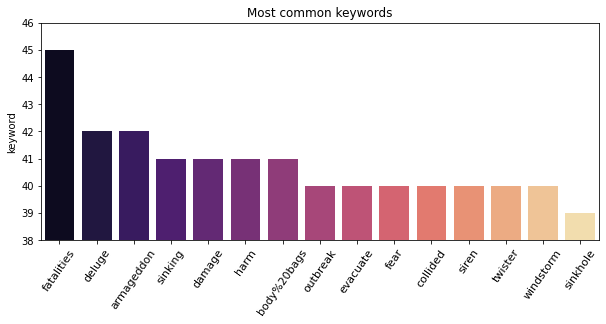

In [30]:
common_keywords = df["keyword"].value_counts().to_frame().head(15)
fig = plt.figure(figsize=(10,4))
sns.barplot(data=common_keywords, x=common_keywords.index, y="keyword",palette="magma")
plt.ylim(38, 46)
plt.title("Most common keywords")
plt.xticks(rotation=55, size=11);

 In the analysis of the distribution of the data in terms of keywords, there is a main word that is transversal to any catastrophic event and that is "fatalities". Then, there are the words related to events that have the component of rain. There are some words that have an important role and that are related to the impact generated by disasters, words like fear, damage, injuries, etc.

#### Most commun words in the tweets

In [31]:
counter = Counter()
for text in df['text'].values:
    for word in text.split():
        counter[word] += 1
counter.most_common(20)

[('the', 2575),
 ('a', 1845),
 ('to', 1805),
 ('in', 1757),
 ('of', 1722),
 ('and', 1302),
 ('I', 1197),
 ('for', 820),
 ('is', 814),
 ('on', 773),
 ('-', 763),
 ('you', 632),
 ('The', 552),
 ('my', 549),
 ('with', 508),
 ('that', 492),
 ('at', 485),
 ('by', 469),
 ('it', 433),
 ('from', 372)]

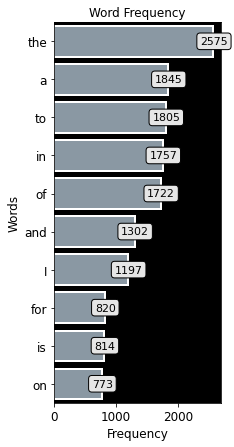

In [32]:
data = dict(sorted(counter.items(), key = lambda x: x[1] ,reverse = True)[:10])
words = list(data.keys())
frequency = list(data.values())
frequency

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 7))
ax.set_facecolor('black')
ax = sns.barplot(x = frequency, y = words, color = '#8699A7', edgecolor = 'white', linewidth = 2)
plt.title('Word Frequency', fontsize = 12)
plt.xlabel('Frequency', fontsize = 12)
plt.ylabel('Words', fontsize = 12)
plt.xticks(size = 12)
plt.yticks(size = 12)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
    width = p.get_width()
    plt.text(9.5 + p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 11)
plt.show()

Finally, in the analysis of the frequency of each word, it is evident that the largest amounts are found in the stop words. This confirms what was previously mentioned, when it was said that when these types of words are not removed, noise is created in the data that biases any analysis that one wants to carry out on the composition of the words.

In [33]:
 #   __  __    ___     ____   _  __  _   _   ____  
 #  |  \/  |  / _ \   / ___| | |/ / | | | | |  _ \ 
 #  | |\/| | | | | | | |     | ' /  | | | | | |_) |
 #  | |  | | | |_| | | |___  | . \  | |_| | |  __/ 
 #  |_|  |_|  \___/   \____| |_|\_\  \___/  |_|    
                                                

<img src="Images/mockup.png"> 

In [34]:
 #  ___                   ____                   _     _         _____   ____       _    
 # |_ _|  _ __           |  _ \    ___   _ __   | |_  | |__     | ____| |  _ \     / \   
 #  | |  | '_ \   _____  | | | |  / _ \ | '_ \  | __| | '_ \    |  _|   | | | |   / _ \  
 #  | |  | | | | |_____| | |_| | |  __/ | |_) | | |_  | | | |   | |___  | |_| |  / ___ \ 
 # |___| |_| |_|         |____/   \___| | .__/   \__| |_| |_|   |_____| |____/  /_/   \_\
 #                                      |_|                                              

#  Removing stop words in the tweets

In [35]:
stop_words = set(stopwords.words('english'))

In [36]:
df['tokenizado'] = df['text_clean'].apply(lambda x: word_tokenize(x))
df.head(3)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target                                         text_clean  word_count  \
0       1  our deeds are the reason of this earthquake ma...          13   
1       1              forest fire near la ronge sask canada           7   
2       1  all residents asked to shelter in place are be...          22   

   size                                         tokenizado  
0    68  [our, deeds, are, the, reason, of, this, earth...  
1    37      [forest, fire, near, la, ronge, sask, canada]  
2   130  [all, residents, asked, to, shelter, in, place...

In [37]:
df['text_clean_non_stopwords'] = df['tokenizado'].apply(lambda x: ' '.join([word for word in x if word not in stop_words]))
df.head(3)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target                                         text_clean  word_count  \
0       1  our deeds are the reason of this earthquake ma...          13   
1       1              forest fire near la ronge sask canada           7   
2       1  all residents asked to shelter in place are be...          22   

   size                                         tokenizado  \
0    68  [our, deeds, are, the, reason, of, this, earth...   
1    37      [forest, fire, near, la, ronge, sask, canada]   
2   130  [all, residents, asked, to, shelter, in, place...   

                            text_clean_non_stopwords  
0       deeds reason earthquake may allah forgive us  
1              forest fire near la ronge sask canada  
2  residents asked shelter place notified officer...

###  Comparing disaster vs non-disaster without stop words


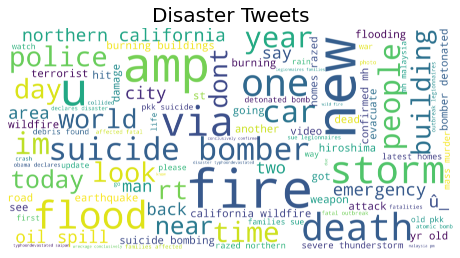

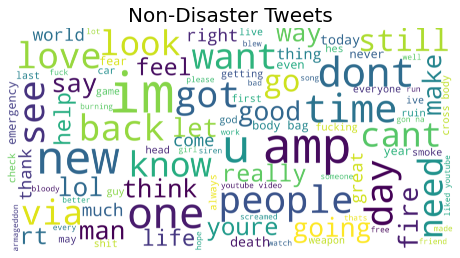

In [38]:
##### Filtering by target equal 1    
word_cloud_rating(df, 1, 'Disaster Tweets', "text_clean_non_stopwords")

##### Filtering by target equal 0    
word_cloud_rating(df, 0, 'Non-Disaster Tweets', "text_clean_non_stopwords")

### Most commun word without stop words

In [39]:
def palabras_principales(numero_palabras, df, columna, target_value):
    counter = Counter()
    for text in  df[df.target == target_value]["text_clean_non_stopwords"].values:
        for word in text.split():
            counter[word] += 1
    data = dict(sorted(counter.items(), key = lambda x: x[1] ,reverse = True)[:numero_palabras])
    words = list(data.keys())
    frequency = list(data.values())
    return frequency, words

In [40]:
frequency_dis, words_dis = palabras_principales(20, df, "text_clean_non_stopwords", 1)
frequency_non, words_non = palabras_principales(20, df, "text_clean_non_stopwords", 0)

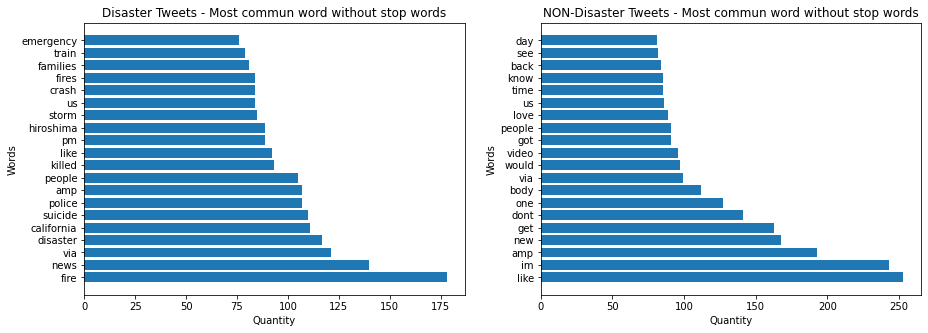

In [41]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.barh(words_dis, frequency_dis)
plt.title('Disaster Tweets - Most commun word without stop words')
plt.ylabel('Words')
plt.xlabel('Quantity')

plt.subplot(1, 2, 2)
plt.barh(words_non, frequency_non)
plt.title('NON-Disaster Tweets - Most commun word without stop words')
plt.ylabel('Words')
plt.xlabel('Quantity')
plt.show()

## Feature Engineering for text with non-stopwords

In [42]:
df['word_count_non_stopwords'] = df['text_clean_non_stopwords'].apply(lambda x: len(x.split()))
df['size_non_stopwords'] = df['text_clean_non_stopwords'].apply(lambda x: len(x))
df.head(3)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target                                         text_clean  word_count  \
0       1  our deeds are the reason of this earthquake ma...          13   
1       1              forest fire near la ronge sask canada           7   
2       1  all residents asked to shelter in place are be...          22   

   size                                         tokenizado  \
0    68  [our, deeds, are, the, reason, of, this, earth...   
1    37      [forest, fire, near, la, ronge, sask, canada]   
2   130  [all, residents, asked, to, shelter, in, place...   

                            text_clean_non_stopwords  \
0       deeds reason earthquake may allah forgive us   
1              forest fire near la ronge sask canada   
2  residents asked shelter place notified officer...   

   word_count_non_stopwords  size_non_stopwords  
0                         7                  44  
1                         7                  37  
2                        11                  88

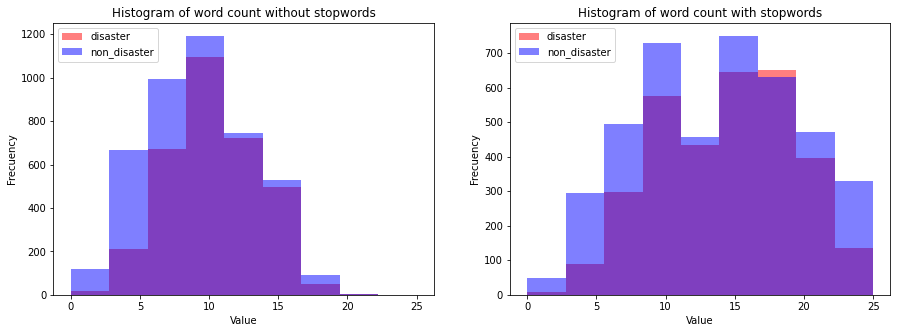

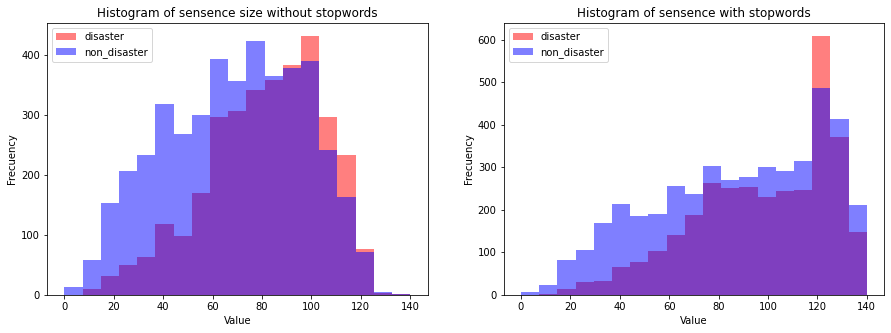

In [43]:
def plot_size(columna1, columna2, title1,title2, maximo, bins_size):
    bins = np.linspace(0, maximo, bins_size)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df[df.target == 1][columna1], bins, alpha=0.5, label='disaster', color ='red')
    plt.hist(df[df.target == 0][columna1], bins, alpha=0.5, label='non_disaster', color ='blue')
    plt.xlabel('Value')
    plt.ylabel('Frecuency')
    plt.legend(loc='upper left')
    plt.title('Histogram of '+title1 )
      
    plt.subplot(1, 2, 2)
    
    plt.hist(df[df.target == 1][columna2], bins, alpha=0.5, label='disaster', color ='red')
    plt.hist(df[df.target == 0][columna2], bins, alpha=0.5, label='non_disaster', color ='blue')
    plt.xlabel('Value')
    plt.ylabel('Frecuency')
    plt.legend(loc='upper left')
    plt.title('Histogram of '+title2 )
    plt.show()

plot_size('word_count_non_stopwords','word_count', 'word count without stopwords','word count with stopwords',25,10)
plot_size('size_non_stopwords','size', 'sensence size without stopwords','sensence with stopwords',140,20)

### BIGRAMS FOR TWEETS (WITH NON STOPWORDS)

In [44]:
word_tokens = nltk.word_tokenize(''.join(df['text_clean_non_stopwords']))

### Bigram

In [45]:
bigrams_series = (pd.Series(nltk.ngrams(word_tokens, 2)).value_counts())[:10]
bigrams_series

(burning, buildings)      50
(youtube, video)          43
(suicide, bomber)         41
(northern, california)    41
(gon, na)                 40
(cross, body)             39
(oil, spill)              37
(california, wildfire)    32
(bomber, detonated)       30
(suicide, bombing)        29
dtype: int64

### Trigram

In [46]:
trigrams_series = (pd.Series(nltk.ngrams(word_tokens, 3)).value_counts())[:10]
trigrams_series

(suicide, bomber, detonated)               30
(northern, california, wildfire)           29
(bomber, detonated, bomb)                  28
(pkk, suicide, bomber)                     28
(homes, razed, northern)                   27
(razed, northern, california)              27
(old, pkk, suicide)                        27
(affected, fatal, outbreak)                26
(declares, disaster, typhoondevastated)    25
(families, affected, fatal)                25
dtype: int64

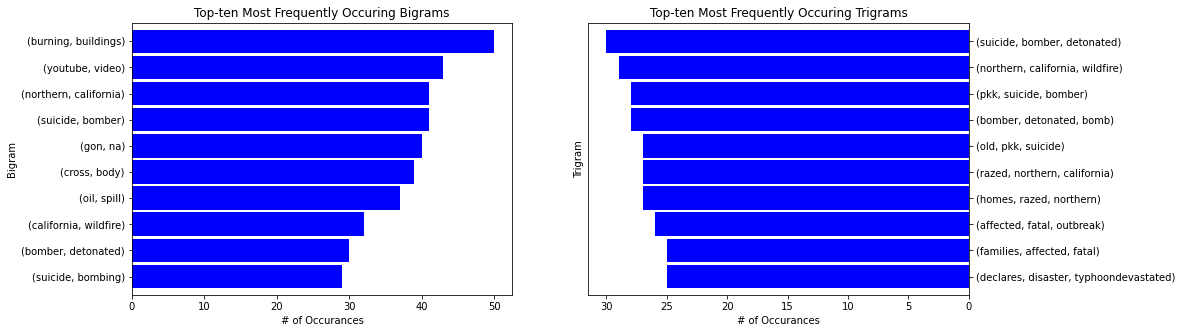

In [47]:
f = plt.figure(figsize=(15, 5))
ax1 =  f.add_subplot(121)
bigrams_series.sort_values().plot.barh(color='blue', width=.9)
plt.title('Top-ten Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

ax2 = f.add_subplot(122)
trigrams_series.sort_values().plot.barh(color='blue', width=.9)
plt.gca().invert_xaxis()
ax2.yaxis.tick_right()
plt.title('Top-ten Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')
plt.show()

## Cleaning the country names

### Plot for check the missing values of location's column

<AxesSubplot:>

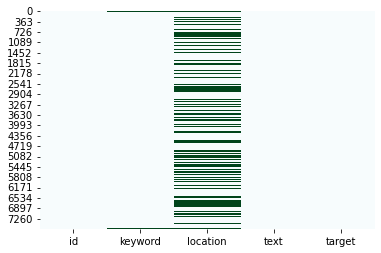

In [48]:
#this plot the color color green represent the missing values all the plot must be have white color. its the reason for try
#extract the location of the text of the tweet.
dfx = pd.read_csv('Data/train.csv', dtype={'id': int, 'keyword': object, 'location': object, 'text': object, 'target': int})
sns.heatmap(dfx.isnull(), cbar=False,cmap="BuGn")

### Special Values

THERE ARE 2 PROBLEMS IN THIS COLUMN (MISSING VALUES AND THE SPACIAL VALUES)

In [49]:
df['location']=df['location'].copy().astype(str)
print( " "+ str(int(df[df['location']!='nan']['location'].count())) + ' valores diferentes de nan con caracteres especiales')
df[df['location']!='nan']['location'].sort_values(ascending=True)


 5080 valores diferentes de nan con caracteres especiales


6771                          
7571                  Glasgow 
1797      Melbourne, Australia
2752                      News
3757                       å_ 
                 ...          
4165           å_: ?? ÌÑ ? : ?
6834      å_å_Los Mina Cityã¢
6989        å¡å¡Midwest Û¢Û¢
7183         åÊ(?Û¢`?Û¢å«)??
2419               åø\_(?)_/åø
Name: location, Length: 5080, dtype: object

### Dictonary location and extract the country

In [50]:
dict_locations = locations.set_index('city').to_dict()['country']
dict_isos=locations.set_index('country').to_dict()['iso3']


### Unique Country

In [51]:
paisesUnicos = list(np.unique(np.array(list(dict_locations.values()))))

### Extract the country and put the iso (key name)

In [52]:
#sacar los nombres de una columna y compararlos con la lista de paises.
def devolverPais(frase,textclean):
    valor = None
    
    if 'uk' in frase or 'uk' in textclean :
        valor= 'GBR'
    elif 'usa' in frase or 'usa' in textclean:
        valor= 'USA'
    elif 'us' in frase or 'us' in textclean:
        valor='USA'    
    else:
        for llave in paisesUnicos:
            if str(llave) in str(frase):
                valor = dict_isos[str(llave)] 
                break
   
        if (valor is None):
    
            for llave in dict_locations.keys():
                if str(llave) in str(frase):
                    valor = dict_isos[str(dict_locations[llave])]
                    break
    
    
        if (valor is None):
            for pais in paisesUnicos:
                if str(pais) in str(textclean):
                    valor = dict_isos[str(pais)] 
                    break
   
        if (valor is None):

            for llave in dict_locations.keys():
                if str(llave) in str(textclean):
                    valor = dict_isos[str(dict_locations[llave])]
                    break
            
    return valor 

### Apply the function "devolverPais"

In [53]:
df["country"] = df['location']
df['country1']=df.apply(lambda x: devolverPais(x.country, x.text_clean_non_stopwords), axis=1)


### Create a new DataFrame (neccesary for graphic)

In [54]:
paises= df.groupby("country1")["country"].count()
paises=paises.to_frame().reset_index()
paises.rename(columns = {'country':'disasters'}, inplace = True)
paises[paises["country1"]!=None].head()

country1  disasters
0      AFG          4
1      ARE          2
2      ARG          1
3      AUS         22
4      AUT          9

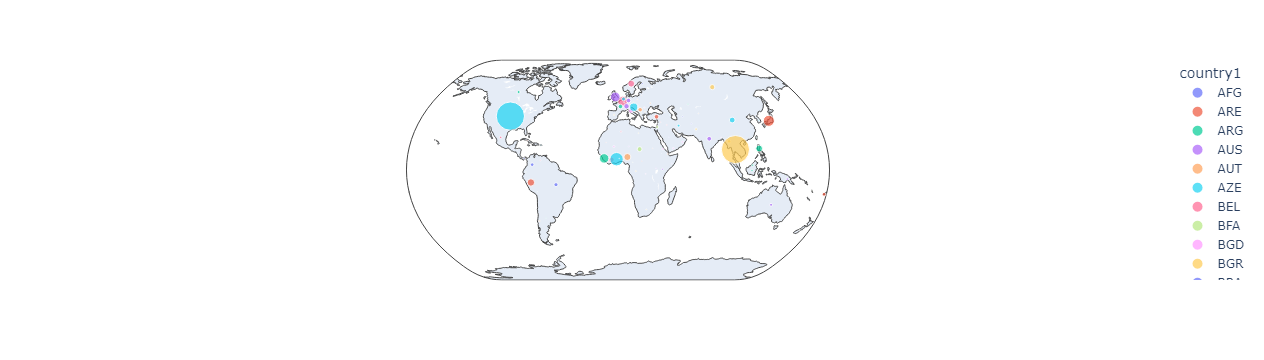

In [55]:
import plotly.express as px
fig = px.scatter_geo(paises, locations='country1',
                     color="country1", # which column to use to set the color of markers
                     hover_name="country1", # column added to hover information
                     size="disasters", # size of markers
                     projection="natural earth")
fig.show()

### Image of the map to the PDF view

<img src="Images/map.png"> 

In [56]:
# ___  ____ ____  _ ____ ____ ___    ____ ____ ___  ____ ____ ___    _  _ ___  ___  ____ ___ ____ 
# |__] |__/ |  |  | |___ |     |     |__/ |___ |__] |  | |__/  |     |  | |__] |  \ |__|  |  |___ 
# |    |  \ |__| _| |___ |___  |     |  \ |___ |    |__| |  \  |     |__| |    |__/ |  |  |  |___ 
                                                                                                                                                                                                                                                               

# Week 9 Project Submission: 

We can see the first two rows of our dataset, which has the cleaned tweet text in the column text_clean

In [397]:
df.head(2)

id keyword location                                               text  \
0   1     NaN      nan  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      nan             Forest fire near La Ronge Sask. Canada   

   target                                         text_clean  word_count  \
0       1  our deeds are the reason of this earthquake ma...          13   
1       1              forest fire near la ronge sask canada           7   

   size                                         tokenizado  \
0    68  [our, deeds, are, the, reason, of, this, earth...   
1    37      [forest, fire, near, la, ronge, sask, canada]   

                       text_clean_non_stopwords  word_count_non_stopwords  \
0  deeds reason earthquake may allah forgive us                         7   
1         forest fire near la ronge sask canada                         7   

   size_non_stopwords country country1  
0                  44     nan      USA  
1                  37     nan      THA

We separate each text into words (tokenize) and put all the words into a single list (tokens):

In [398]:
token_lists = [word_tokenize(each) for each in df.text_clean]
tokens = [item for sublist in token_lists for item in sublist]

In [399]:
print("Number of unique tokens is: ", len(set(tokens)))

Number of unique tokens is:  21835


There are 179 english stop words from nltk:

In [400]:
import nltk
nltk.download('stopwords')

noise_words = []
stopwords_corpus = nltk.corpus.stopwords
eng_stop_words = stopwords_corpus.words('english')
noise_words.extend(eng_stop_words)
print(len(noise_words))
# noise_words


179


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We extract the top 1% words in our dataset (218 words) and we see the first 10:

In [401]:
one_percentile = int(len(set(tokens)) * 0.01)
top_1_percentile = Counter(tokens).most_common(one_percentile)
one_percentile

218

In [402]:
top_1_percentile[:10]

[('the', 3263),
 ('a', 2188),
 ('in', 1977),
 ('to', 1945),
 ('of', 1823),
 ('and', 1418),
 ('i', 1398),
 ('is', 944),
 ('for', 890),
 ('on', 853)]

We also see the 10 least common words:

In [403]:
bottom_1_percentile = Counter(tokens).most_common()[-one_percentile:]
bottom_1_percentile[:10]

[('scabs', 1),
 ('dauntedpsyche', 1),
 ('gently', 1),
 ('dabbed', 1),
 ('rag', 1),
 ('crawling', 1),
 ('hea', 1),
 ('rams', 1),
 ('soldi', 1),
 ('httptcoobszybaj', 1)]

We append the top 1% and bottom 1% words to the noise words list:

In [404]:
noise_words.extend([word for word,val in top_1_percentile])
noise_words.extend([word for word,val in bottom_1_percentile])

In [405]:
len(noise_words)

615

Now we have 615 words.

## Building our machine learning model 

For our model, the variables of interest in the dataframe to train the model are the texts and the target as response variables (to be predicted) that are saved with the name "df_model"

In [406]:
df_model = df[['text_clean', 'target']]
df_model.head(2)

text_clean  target
0  our deeds are the reason of this earthquake ma...       1
1              forest fire near la ronge sask canada       1

The PorterStemmer and CountVectorizer functions are saved to define a function that can be applied to the text to be analyzed, the stemmer.stem functionality performs a lemmatization of the words, that is, to obtain common roots, the CountVectorizer functionality converts the words (tokens) of the text into a word count sparse matrix.

In [407]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

The countVectorizer function is given the previously tokenized words, given the noise_words to remove them from parsing, and set n_grams equal to 1 to parse per word.

In [408]:
# Creating a python object of the class CountVectorizer
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=noise_words,
    ngram_range=(1, 1)
)

Next, a percentage of the data is specified as a training base and another as a test to start the model training. 80% is defined as a training base and 20% as a test base. In addition, a standardization will be applied to the data set with fit_transform for training and transform for test data.

In [409]:
reviews_train, reviews_test = train_test_split(df_model, test_size=0.2, random_state=0)

In [410]:
X_train_bow = bow_counts.fit_transform(reviews_train.text_clean)
X_test_bow = bow_counts.transform(reviews_test.text_clean)

C:\Users\oscar\Documents\Git\ds4a\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'might', 'must', "n't", 'sha', 'wo'] not in stop_words.



In [411]:
y_train_bow = reviews_train['target']
y_test_bow = reviews_test['target']

In [412]:
y_test_bow.value_counts() / y_test_bow.shape[0]

0    0.581747
1    0.418253
Name: target, dtype: float64

### Applying logistic regression

Once the text data has been cleaned, they are entered into a first test model, where logistic regression will be used as a data training model and the model is adjusted.

In [413]:
# lr_model_all = LogisticRegression(C=0.9, solver="liblinear") #c = float
lr_model_all = LogisticRegression(max_iter=2000,penalty='l2') #c = float
lr_model_all.fit(X_train_bow, y_train_bow)

LogisticRegression(max_iter=2000)

To evaluate the model's classification performance, the precision metrics F1-score and Accuracy will be reviewed, which are established from the true positives and negatives and false positives and negatives of the confusion matrix as follows:

<img src=https://miro.medium.com/max/1400/1*Tmbqxgs51wdK4mwbXJbtoA.png>

To evaluate the performance of the model, the following measures are calculated $$F1score:2\frac{precision.recal}{precision+recall}$$ Where $$presicion:\frac{TP}{TP+FP} \quad recall:\frac{TP}{TP+FN}$$ And $$ Accuracy:\frac{TP+TN}{TP+TN+FP+FN}$$

The **F1 score** value is used to combine the precision and recall measures into a single value and the **Accuracy** measures the percentage of cases that the model has got right.

In [414]:
accuracy = []
diff = []

In [415]:
# Predicting the output
test_pred_lr_prob = lr_model_all.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)



F1 score:  0.7109170305676855
Accuracy:  78.26657912015759


In [416]:
diff.append(lr_model_all.score(X_train_bow, y_train_bow) - lr_model_all.score(X_test_bow, y_test_bow))

In [417]:
accuracy.append(lr_model_all.score(X_test_bow,y_test_bow))

With our initial model we obtained these percentages of performance, adjustments and other models will be evaluated to achieve performance metrics closer to 1

Next, the probabilities obtained by applying the logistic model are obtained and a dataframe is built by joining the original data with the Target (Response Variable) and the prediction column thrown by the model and the associated probability are added in order to perform a review of misclassifications and see the range of probabilities associated with classification 0 and 1 in the model.

In [418]:
probabilities = [each[1] for each in test_pred_lr_prob]

In [419]:
predictions = pd.DataFrame()
predictions['Text'] = reviews_test['text_clean']
predictions['Target'] = reviews_test['target']
predictions['Predicted_dissaster'] = test_pred_lr_all
predictions['Predicted_probability'] = probabilities

In [420]:
predictions.head(10)

Text  Target  \
311   katiekatcubs you already know how this shit go...       0   
4970  lemairelee danharmon people near meltdown comi...       0   
527    tix calgary flames vs col avalanche preseason...       0   
6362  if you ever think you running out of choices i...       0   
800   if you dotish to blight your car go right ahea...       0   
3074                               electrocute yourself       0   
1833  thief broke front window of hicksville store s...       0   
2272  doone silver architects has won permission to ...       0   
1234  fire destroys two buildings on nd street in ma...       1   
1326  minsuwoongs i completely understand because i ...       0   

      Predicted_dissaster  Predicted_probability  
311                     0               0.119804  
4970                    0               0.221640  
527                     0               0.370711  
6362                    0               0.061313  
800                     0               0.106034  
3074                    0               0.122896  
1833                    0               0.203198  
2272                    0               0.219244  
1234                    1               0.946055  
1326                    0               0.305826

the next steps are:
    1.train the model (logistic regresion)
    2.remove de noise words and 
    3.identify the words that describe a disaster and what words don't describe this event (through the weight)

In [421]:
lr_model_all_new = LogisticRegression(C=0.9, solver="liblinear")
lr_model_all_new

LogisticRegression(C=0.9, solver='liblinear')

In [422]:
# Training the model
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_prob = lr_model_all_new.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

In [423]:
lr_weights = pd.DataFrame(list(
    zip(
        bow_counts.get_feature_names(),
        lr_model_all_new.coef_[0])
    ),
    columns=['words','weights']
)

lr_weights.sort_values(['weights'],ascending = False)[:15]

C:\Users\oscar\Documents\Git\ds4a\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



words   weights
13950       razed  1.898605
4289    evacuated  1.799120
3356   derailment  1.730210
3915   earthquake  1.725938
12847    outbreak  1.645579
12190    nagasaki  1.535950
12126      murder  1.533873
10273       japan  1.504762
1623       bridge  1.486642
17055     typhoon  1.482392
13307       plane  1.475223
17786        wild  1.471185
11507    massacre  1.431918
2019   casualties  1.414653
2891        crews  1.408458

In [424]:
lr_weights.sort_values(['weights'],ascending = False)[-15:]

words   weights
4752     flattened -1.032861
11923         mode -1.036422
2945         crush -1.040036
1393      bleeding -1.044023
16849  traumatised -1.047694
2946       crushed -1.117551
10373         jobs -1.126699
1389       blazing -1.129408
4024   electrocute -1.143232
1248        better -1.160048
1846          cake -1.168729
1399          blew -1.169843
14572         ruin -1.200711
3937          ebay -1.258721
971           bags -1.465151

# Other parameters, noise words removed

In [425]:
# Changes with respect to the previous code
# 1. Increasing the n-grams from just having 1-gram to (1-gram, 2-gram,3-gram and 4-gram)
# 2. Including the stopwords in the bag of words features

bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)

X_train_bow = bow_counts.fit_transform(reviews_train.text_clean)
X_test_bow = bow_counts.transform(reviews_test.text_clean)

In [426]:
lr_model_all_new = LogisticRegression(C=0.9, solver="liblinear")
lr_model_all_new

LogisticRegression(C=0.9, solver='liblinear')

In [427]:
# Training the model
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_prob = lr_model_all_new.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

accuracy.append(accuracy_score(y_test_bow, test_pred_lr_all))
diff.append(lr_model_all_new.score(X_train_bow, y_train_bow) - lr_model_all_new.score(X_test_bow, y_test_bow))

F1 score:  0.7402135231316725
Accuracy:  80.82731451083389


In [428]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [429]:
lrpred = lr_model_all_new.predict(X_test_bow)

In [430]:
print("classification report for logistic regression")
print(classification_report(y_test_bow,lrpred))

classification report for logistic regression
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       886
           1       0.85      0.65      0.74       637

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.81      0.81      0.80      1523



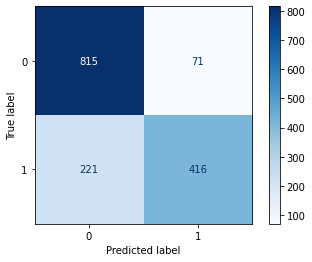

In [431]:
ConfusionMatrixDisplay.from_estimator(lr_model_all_new, X_test_bow, y_test_bow,cmap="Blues")

The accuracy has jumped from to 80.8%. This is an example of what simple hyperparameter tuning and input feature modification can do to the overall performance. We can even get interpretable features from this in terms of what contributed the most to positive and negative sentiment:

### Palabras asociadas a comentarios de desastres o no desastres

We can even get interpretable features in terms of what contributed the most to positive and negative sentiment:

in this firt dataframe we can see that the 5 most important words that made match with the distar are: "hiroshima, fire,california, earthquake and floods"

In [432]:
lr_weights = pd.DataFrame(list(
    zip(
        bow_counts.get_feature_names(),
        lr_model_all_new.coef_[0])
    ),
    columns=['words','weights']
)

lr_weights.sort_values(['weights'],ascending = False)[:5]

C:\Users\oscar\Documents\Git\ds4a\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



words   weights
71991   hiroshima  1.666854
56060       fires  1.516711
29185  california  1.347111
48157  earthquake  1.264319
57166      floods  1.201857

in the second dataframe we can see that the 5 most important words that did not match with the distar are: "im, new, screams, body, you"

In [433]:
lr_weights.sort_values(['weights'],ascending = False)[-5:]

words   weights
83767        im -0.748911
114173      new -0.769972
142987  screams -0.810001
24180      body -0.850172
191837      you -1.088375

### Random forests classification

In [434]:
rf_model_all = RandomForestClassifier(n_estimators=100)

# Training the data
rf_model_all.fit(X_train_bow, y_train_bow)

# Generating predictions
test_pred_lr_prob = rf_model_all.predict_proba(X_test_bow)
test_pred_lr_all = rf_model_all.predict(X_test_bow)


In [435]:
print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

accuracy.append(accuracy_score(y_test_bow, test_pred_lr_all))
diff.append(rf_model_all.score(X_train_bow, y_train_bow) - rf_model_all.score(X_test_bow, y_test_bow))

F1 score:  0.6511156186612577
Accuracy:  77.41300065659883


the accuracy with the random forest is lower, this show us that there aren't perfects models, the best way to find the best model is try y compare differents models.

## TF-IDF model 

We employ the **Term Frequency-Inverse Document Frequency (TF-IDF)** method to evaluates how important a word is into a tweet. 

The relevance of a word grows according to the number of times it appears in the tweet, but this is mitigated by the frequency of the term in the corpus.

For our case, the TF-IDF weight is the product of two terms. The first computes the normalized Term Frequency (TF); i.e. the number of times a word appears in a tweet divided by the total number of words in that all tweets. The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the tweets  divided by the number of tweets where the specific term appears:

TF-IDF doesn't just count each word - it applies a weighting so that common words receive less attention and rare words receive more.

Were-featurize our original set of tweets based on TF-IDF and split the resulting features into train and test sets a:

In [436]:
# Create a vectorizer - we still feed in our stop words, although
# these are less relevant now as TF-IDF would weight them less anyway.
tfidf_counts = TfidfVectorizer(
    tokenizer=word_tokenize,
    stop_words=noise_words,
    ngram_range=(1,3)
)

X_train_tfidf = tfidf_counts.fit_transform(reviews_train.text_clean)
X_test_tfidf = tfidf_counts.transform(reviews_test.text_clean)

C:\Users\oscar\Documents\Git\ds4a\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'might', 'must', "n't", 'sha', 'wo'] not in stop_words.



#### Applying logistic regression to TF-IDF features

We applied logistic regression to the features created from TF-IDF:

In [437]:
# Create the classifier
lr_model_tf_idf = LogisticRegression(solver="liblinear")

# Train the classifier
lr_model_tf_idf.fit(X_train_tfidf, y_train_bow)

# Predict the results
test_pred_lr_prob = lr_model_tf_idf.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

accuracy.append(accuracy_score(y_test_bow, test_pred_lr_all))
diff.append(lr_model_tf_idf.score(X_train_tfidf, y_train_bow) - lr_model_tf_idf.score(X_test_tfidf, y_test_bow))

F1 score:  0.6754468485418628
Accuracy:  77.34734077478662


We achieved an accuracy of ***77.3*** percent with ***TF-IDF*** vs ***78.26*** percent with ***1-grams***. In this case a more advanced vectorizing method produces inferior results, although it's possible that penalizing terms that are prevalent across the tweets disadvantages this specific sample. 

### Increasing the model accuracy

We modified the parameters of the logistic regression as

* Setting ngram_range=***(1,4)*** in the Vectorizer
* Not removing the noise words beforehand in the Vectorizer
* Setting ***C=10*** in the LogisticRegression classsifier
* Setting ***penalty=l1*** in the LogisticRegression classifier

In [438]:
# Changes: Removing stop words and including 1-4 grams in the tf-idf data
tfidf_counts = TfidfVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)

#Applying the transformations
X_train_tfidf = tfidf_counts.fit_transform(reviews_train.text_clean)
X_test_tfidf = tfidf_counts.transform(reviews_test.text_clean)

In [439]:
# Setting up the model class
lr_model_tf_idf_new = LogisticRegression(solver="liblinear", penalty='l1', C=10)

# Training the model 
lr_model_tf_idf_new.fit(X_train_tfidf, y_train_bow)

# Prediciting the results
test_pred_lr_prob = lr_model_tf_idf_new.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf_new.predict(X_test_tfidf)

C:\Users\oscar\Documents\Git\ds4a\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [440]:
## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

F1 score:  0.7415222305953277
Accuracy:  77.47866053841102


This is not an improvement over our prior result (just 0.1). Moreover,  we made four modifications four modifications at the same time, so we don't know which ones benefited.

We employ new hyperparameters to enhance your model, which is known as **hyperparameter tuning**. 

We can also find our most important features again, as below:

In [441]:
lr_weights = pd.DataFrame(
    list(
        zip(tfidf_counts.get_feature_names(), lr_model_tf_idf_new.coef_[0])
    ),
    columns=['words','weights']
)

lr_weights.sort_values(['weights'],ascending = False)[:10]

C:\Users\oscar\Documents\Git\ds4a\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



words    weights
71991    hiroshima  37.447907
42624   derailment  36.618077
56060        fires  30.126089
186717    wildfire  29.059897
51044    evacuated  27.113586
107373          mh  26.077948
175823     typhoon  25.767469
96112       killed  25.686145
57166       floods  25.580745
173441       train  24.957831

In [442]:
lr_weights.sort_values(['weights'],ascending = False)[-10:]

words    weights
29008       cake -14.015396
87173      in to -14.181602
147937   slicker -14.265625
145498      shes -14.425624
22075     better -15.882060
131198      poll -16.889290
84791      in an -17.263274
191837       you -17.562732
48381       ebay -19.009964
132172  pregnant -24.493019

## Word embeddings model 

Finally, we are going to use the word embedding model, that is a type type of word representation that allows words with similar meaning to have a similar representation. 

In [443]:
from IPython.display import Image
from IPython.core.display import HTML

There are different methods to learn word embeddings. For our case we will use a model that is part of word2vec, one of the most famous methods.

In [444]:
import gensim
import os

In [445]:
model = gensim.models.KeyedVectors.load_word2vec_format(
    os.path.join(os.getcwd(), 'extra_Data/glove.twitter.27B.200d_out.txt'),
    binary=False,
    unicode_errors='ignore'
)

In [446]:
print("The embedding for great is", len(model['great']), "dimensional")

The embedding for great is 200 dimensional


Now, we are going to calculate the vector for every single tweet in our dataset

In [447]:
review_embeddings = []

for each_review in df.text_clean:
    review_average = np.zeros(model.vector_size)
    count_val = 0
    
    for each_word in word_tokenize(each_review):

        # Change to "if True" to remove stop words from the 
        # averaged embeddings
        if False:
            if(each_word.lower() in noise_words):
                print(each_word.lower())
                continue
        
        if(each_word.lower() in model):
            review_average += model[each_word.lower()]
            count_val += 1
    
    review_embeddings.append(list(review_average/count_val))

Then, we converts the list of vector representations for each tweet into a new dataframe ans split into train and test sets


In [448]:
embedding_data = pd.DataFrame(review_embeddings)
embedding_data = embedding_data.fillna(0)

In [449]:
embedding_data

0         1         2         3         4         5         6    \
0     0.108250  0.188131  0.062986  0.194486 -0.001881 -0.040202  0.564872   
1    -0.220747  0.023442 -0.000856 -0.125343 -0.073099  0.136962 -0.162845   
2    -0.006144  0.052788 -0.110666  0.068702  0.006853 -0.089639  0.340205   
3    -0.047149  0.234074 -0.174452 -0.046020 -0.005730 -0.268226  0.343314   
4     0.044636  0.103785 -0.093103 -0.084075 -0.118164 -0.009113  0.315092   
...        ...       ...       ...       ...       ...       ...       ...   
7608 -0.013925 -0.231666  0.185319 -0.050083 -0.197415 -0.005173  0.221646   
7609  0.111583  0.124117  0.136007  0.052229  0.014320  0.201048  0.014427   
7610  0.095854 -0.211395  0.198540 -0.174637 -0.198384  0.274523 -0.261606   
7611  0.013837 -0.060608 -0.163748  0.156594 -0.039200  0.087506 -0.052470   
7612 -0.101475  0.111370 -0.285655 -0.092477 -0.262105 -0.200418 -0.102116   

           7         8         9    ...       190       191       192  \
0    -0.007825 -0.116076  0.029780  ... -0.105513  0.069882  0.143943   
1    -0.100948 -0.053673 -0.254210  ...  0.244066 -0.045801  0.292360   
2     0.061716 -0.007709 -0.083422  ...  0.114905  0.007426 -0.059770   
3    -0.257501  0.096533 -0.254752  ...  0.388073 -0.063323  0.002195   
4    -0.068271 -0.200368 -0.280023  ...  0.076920  0.056044  0.170939   
...        ...       ...       ...  ...       ...       ...       ...   
7608 -0.181914 -0.016537 -0.134433  ...  0.269424 -0.057431 -0.013332   
7609 -0.199076 -0.086736 -0.166366  ...  0.118171 -0.100123 -0.042156   
7610 -0.162661  0.131034 -0.275409  ...  0.214036 -0.065755  0.091812   
7611 -0.131980  0.083258 -0.244543  ... -0.085794 -0.082659 -0.013178   
7612 -0.059997  0.161464 -0.308507  ...  0.303643 -0.055302  0.031210   

           193       194       195       196       197       198       199  
0    -0.060606 -0.081343 -0.115012  0.183697  0.164704  0.130413 -0.150103  
1    -0.093404  0.218210  0.085573  0.242977 -0.209306  0.169360 -0.036763  
2    -0.081865  0.004269 -0.066185  0.180537  0.083985  0.074647  0.030364  
3    -0.127794  0.134719 -0.020544  0.116155  0.026271 -0.008799  0.203327  
4     0.050509  0.147566 -0.006420  0.190596 -0.061581 -0.088374 -0.045519  
...        ...       ...       ...       ...       ...       ...       ...  
7608 -0.050611  0.169764 -0.150342  0.064910 -0.019655 -0.005054 -0.005577  
7609  0.020276 -0.001781  0.013951  0.132407 -0.008701 -0.175350 -0.196120  
7610  0.253508  0.060232 -0.108594  0.332066 -0.240490  0.156695  0.223105  
7611 -0.032189 -0.011975 -0.206954 -0.003910  0.161374  0.136489 -0.083430  
7612 -0.037192  0.108386 -0.075800  0.063701 -0.096478 -0.174138 -0.014613  

[7613 rows x 200 columns]

In [450]:
X_train_embed, X_test_embed, y_train_embed, y_test_embed =  train_test_split(
    embedding_data,
    df.target,
    test_size=0.2,
    random_state=0
)

Now, we applied logistic regression for our word embedding representation 

In [451]:
lr_model = LogisticRegression(penalty="l1", C=10, solver="liblinear")
lr_model.fit(X_train_embed, y_train_embed)
test_pred_lr_prob = lr_model.predict_proba(X_test_embed)
test_pred_lr_all = lr_model.predict(X_test_embed)

print("F1 score: ", f1_score(y_test_embed, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_embed, test_pred_lr_all)*100)
diff.append(lr_model.score(X_train_embed, y_train_embed) - lr_model.score(X_test_embed, y_test_embed))

F1 score:  0.7502102607232969
Accuracy:  80.49901510177281


In [452]:
accuracy.append(accuracy_score(y_test_bow, test_pred_lr_all))

As we can see, we increase the accuracy of our model. It's not enough but is a great advance in order to build a 100% accuracy model to predict the specific situation

# Week 10 Project Submission: Project Report Update


## Ridge Classifier

train accuracy: 0.9967159277504105 
 test accuracy: 0.799080761654629


classification report for ridge classifier
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       886
           1       0.84      0.64      0.73       637

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.78      1523
weighted avg       0.81      0.80      0.79      1523



confusion matrix for ridge classifier


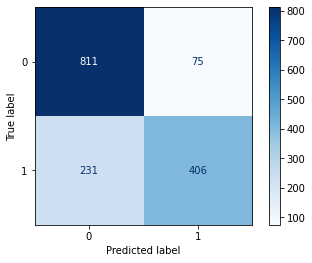

In [453]:
rc = RidgeClassifier()
model0 = rc.fit(X_train_bow, y_train_bow)

print("train accuracy:",model0.score(X_train_bow, y_train_bow),"\n","test accuracy:",model0.score(X_test_bow,y_test_bow))

rcpred = rc.predict(X_test_bow)
print("\n")
print("classification report for ridge classifier")
print(classification_report(y_test_bow, rcpred))
print("\n")
print("confusion matrix for ridge classifier")
ConfusionMatrixDisplay.from_estimator(rc, X_test_bow, y_test_bow,cmap="Blues")

## Support Vector Machines

train accuracy: 0.9967159277504105 
 test accuracy: 0.8010505581089954


classification report for support vector machines 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       886
           1       0.84      0.65      0.73       637

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.81      0.80      0.80      1523



confusion matrix for support vector machines


C:\Users\oscar\Documents\Git\ds4a\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



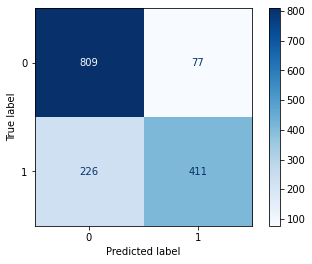

In [454]:
svm = LinearSVC()
model2 = svm.fit(X_train_bow, y_train_bow)
print("train accuracy:",model2.score(X_train_bow, y_train_bow),"\n","test accuracy:",model2.score(X_test_bow,y_test_bow))

svmpred = svm.predict(X_test_bow)
print("\n")
print("classification report for support vector machines ")
print(classification_report(y_test_bow,svmpred))
print("\n")
print("confusion matrix for support vector machines")
ConfusionMatrixDisplay.from_estimator(svm, X_test_bow, y_test_bow,cmap="Blues")

train accuracy: 0.9967159277504105 
 test accuracy: 0.7977675640183848


classification report for support vector machines 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       886
           1       0.84      0.64      0.73       637

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.78      1523
weighted avg       0.80      0.80      0.79      1523



confusion matrix for support vector machines


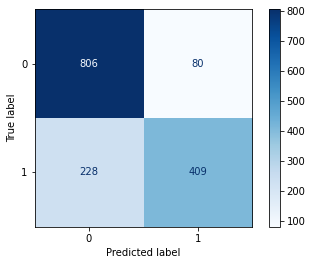

In [455]:
svm = SVC(kernel='linear',C=1.0)
model2 = svm.fit(X_train_bow, y_train_bow)
print("train accuracy:",model2.score(X_train_bow, y_train_bow),"\n","test accuracy:",model2.score(X_test_bow,y_test_bow))
svmpred = svm.predict(X_test_bow)
print("\n")
print("classification report for support vector machines ")
print(classification_report(y_test_bow,svmpred))
print("\n")
print("confusion matrix for support vector machines")
ConfusionMatrixDisplay.from_estimator(svm, X_test_bow, y_test_bow,cmap="Blues")

## Decision tree classifier

train accuracy: 0.9967159277504105 
 test accuracy: 0.7399868680236376


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       886
           1       0.71      0.65      0.67       637

    accuracy                           0.74      1523
   macro avg       0.73      0.73      0.73      1523
weighted avg       0.74      0.74      0.74      1523



confusion matrix for decision tree classifier


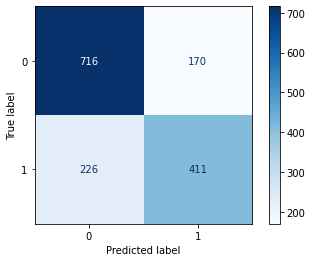

In [456]:

dt=DecisionTreeClassifier()
model3=dt.fit(X_train_bow, y_train_bow)
print("train accuracy:",model3.score(X_train_bow, y_train_bow),"\n","test accuracy:",model3.score(X_test_bow,y_test_bow))

dtpred = dt.predict(X_test_bow)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(y_test_bow,dtpred))
print("\n")
print("confusion matrix for decision tree classifier")
ConfusionMatrixDisplay.from_estimator(dt, X_test_bow, y_test_bow,cmap="Blues")

## Gradient boost classifier

train accuracy: 0.7733990147783252 
 test accuracy: 0.7603414313854235


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       886
           1       0.82      0.55      0.66       637

    accuracy                           0.76      1523
   macro avg       0.78      0.73      0.74      1523
weighted avg       0.77      0.76      0.75      1523



confusion matrix for gradient boosting classifier


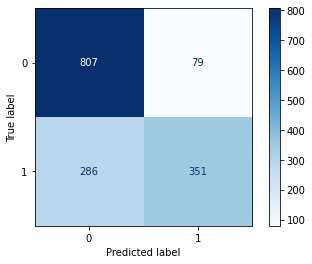

In [457]:
gbm=GradientBoostingClassifier()
model5=gbm.fit(X_train_bow, y_train_bow)
print("train accuracy:",model5.score(X_train_bow, y_train_bow),"\n","test accuracy:",model5.score(X_test_bow,y_test_bow))

gbmpred = gbm.predict(X_test_bow)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(y_test_bow,gbmpred))
print("\n")
print("confusion matrix for gradient boosting classifier")
ConfusionMatrixDisplay.from_estimator(gbm, X_test_bow, y_test_bow,cmap="Blues")

## Adaboost Classifier 

train accuracy: 0.7579638752052545 
 test accuracy: 0.7564018384766907


classification report for adaboost classifier
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       886
           1       0.83      0.53      0.64       637

    accuracy                           0.76      1523
   macro avg       0.78      0.72      0.73      1523
weighted avg       0.77      0.76      0.74      1523



confusion matrix for adaboost classifier


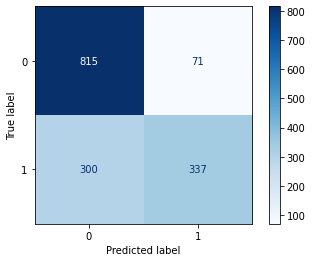

In [458]:
ada=AdaBoostClassifier()
model6=ada.fit(X_train_bow, y_train_bow)
print("train accuracy:",model6.score(X_train_bow, y_train_bow),"\n","test accuracy:",model6.score(X_test_bow,y_test_bow))

adapred = ada.predict(X_test_bow)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(y_test_bow,adapred))
print("\n")
print("confusion matrix for adaboost classifier")
ConfusionMatrixDisplay.from_estimator(ada, X_test_bow, y_test_bow,cmap="Blues")

## Extreme Gradient Boost Classifier

train accuracy: 0.8622331691297208 
 test accuracy: 0.7951411687458962


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       886
           1       0.84      0.63      0.72       637

    accuracy                           0.80      1523
   macro avg       0.81      0.77      0.78      1523
weighted avg       0.80      0.80      0.79      1523



confusion matrix for extreme gradient boosting classifier


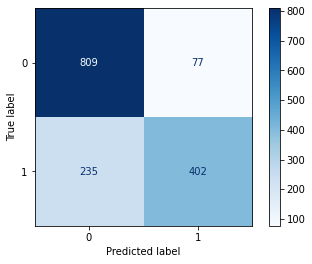

In [459]:
xgb = XGBClassifier(random_state=1234)
model7=xgb.fit(X_train_bow, y_train_bow)
print("train accuracy:",model7.score(X_train_bow, y_train_bow),"\n","test accuracy:",model7.score(X_test_bow,y_test_bow))
xgbpred = xgb.predict(X_test_bow)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(y_test_bow,xgbpred))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
ConfusionMatrixDisplay.from_estimator(xgb, X_test_bow, y_test_bow,cmap="Blues")

In [460]:
accuracy.append(model0.score(X_test_bow,y_test_bow))
accuracy.append(model2.score(X_test_bow,y_test_bow))
accuracy.append(model3.score(X_test_bow,y_test_bow))
accuracy.append(model5.score(X_test_bow,y_test_bow))
accuracy.append(model6.score(X_test_bow,y_test_bow))
accuracy.append(model7.score(X_test_bow,y_test_bow))

print(accuracy)

[0.7826657912015759, 0.8082731451083388, 0.7741300065659882, 0.7734734077478661, 0.8049901510177282, 0.799080761654629, 0.7977675640183848, 0.7399868680236376, 0.7603414313854235, 0.7564018384766907, 0.7951411687458962]


In [461]:
diff.append(model0.score(X_train_bow, y_train_bow) - model0.score(X_test_bow, y_test_bow))
diff.append(model2.score(X_train_bow, y_train_bow) - model2.score(X_test_bow, y_test_bow))
diff.append(model3.score(X_train_bow, y_train_bow) - model3.score(X_test_bow, y_test_bow))
diff.append(model5.score(X_train_bow, y_train_bow) - model5.score(X_test_bow, y_test_bow))
diff.append(model6.score(X_train_bow, y_train_bow) - model6.score(X_test_bow, y_test_bow))
diff.append(model7.score(X_train_bow, y_train_bow) - model7.score(X_test_bow, y_test_bow))

In [462]:
print(len(diff))

11


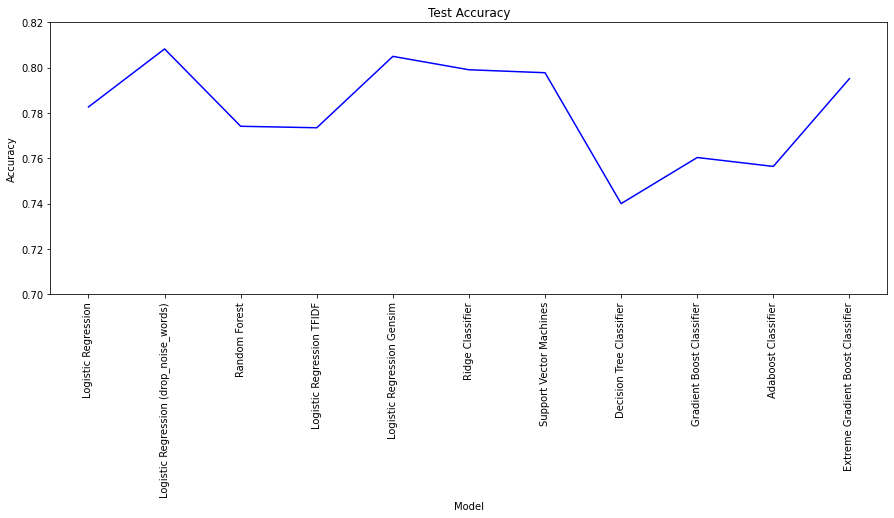

In [465]:
fig = plt.figure(figsize = (15, 5))
plt.plot(names, accuracy, "b-")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.ylim(0.70,0.82)
plt.title("Test Accuracy")
plt.show()

In this graphic we plot all of accuracy results that we obtained in our models. The best accuracy is associated with the logistic regression (drop noise words) andt the worst accuracy is associated with the decision tree classifier.

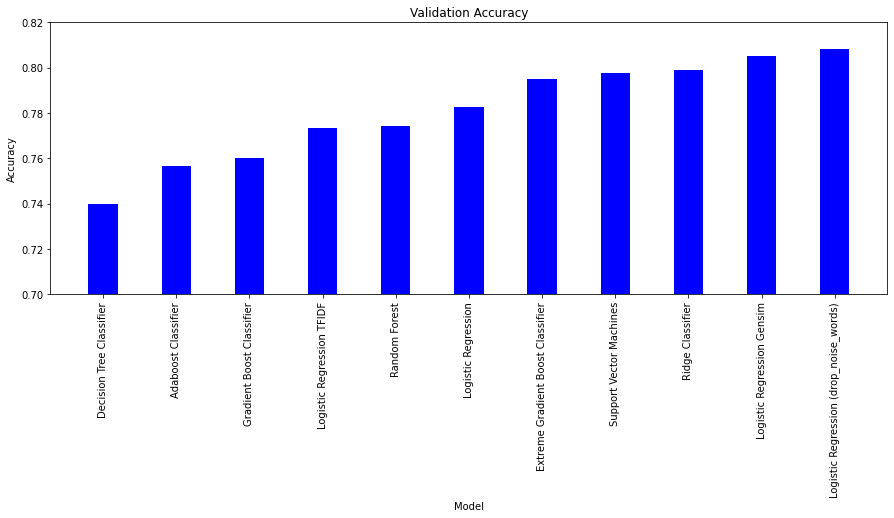

In [471]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot

names = ["Logistic Regression",
         "Logistic Regression (drop_noise_words)",
         "Random Forest", 
         "Logistic Regression TFIDF",
         "Logistic Regression Gensim",
         "Ridge Classifier", 
         "Support Vector Machines", 
         "Decision Tree Classifier",
         "Gradient Boost Classifier",
         "Adaboost Classifier", 
         "Extreme Gradient Boost Classifier"]

df_accuracy = pd.DataFrame()
df_accuracy["names"]=names
df_accuracy["accuracy"]=accuracy

df_accuracy = df_accuracy.sort_values("accuracy")

plt.bar(df_accuracy["names"], df_accuracy["accuracy"], color ='blue', width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.ylim(0.70,0.82)
plt.title("Validation Accuracy")

plt.show()

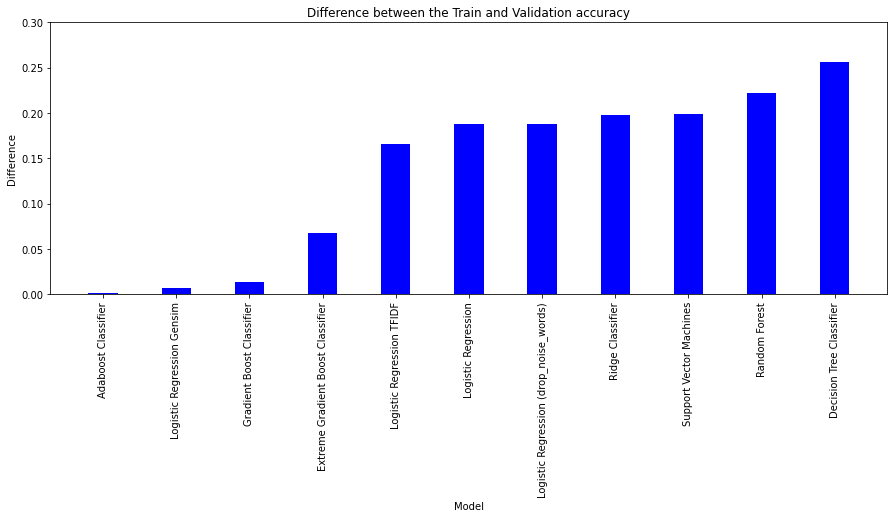

In [470]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot

names = ["Logistic Regression",
         "Logistic Regression (drop_noise_words)",
         "Random Forest", 
         "Logistic Regression TFIDF",
         "Logistic Regression Gensim",
         "Ridge Classifier", 
         "Support Vector Machines", 
         "Decision Tree Classifier",
         "Gradient Boost Classifier",
         "Adaboost Classifier", 
         "Extreme Gradient Boost Classifier"]

df_accuracy = pd.DataFrame()
df_accuracy["names"]=names
df_accuracy["diff"]=diff

df_accuracy = df_accuracy.sort_values("diff")

plt.bar(df_accuracy["names"], df_accuracy["diff"], color ='blue', width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Difference")
plt.xticks(rotation=90)
plt.ylim(0.0,0.3)
plt.title("Difference between the Train and Validation accuracy")

plt.show()

In this graph, we obtained the difference between each train accuracy and each validation accuracy, in order to identify the less overfitting models and the most. In this case the minor difference is associated with the best result, and the major difference is associated with a overfitting model.

In this case, the minor difference is obtained by the Adaboost classifier and the major difference is obtained by the Decision tree classifier model. Even though the best result is obtained by de Adaboost classifier model, it's necessary find a balance between the difference and the accuracy result. This model has the smallest difference, but one of the smallest accuracy. We should find a small difference with a big accuracy as the logistic regression gensim model, that is the second smallest difference and one of the most accurate.

## Summary
- First of all, we imported all the libraries that would be useful to analyze the information of the datasets (pandas, numpy, matplotlib, etc)

- Then, we uploaded the two datasets (train and test datasets) into our notebook and we gave a basic description of it, describing its columns and summarizing some important information for our case, like the most repetitive target in the data (0: not disaster)

- Thirdly, we cleaned the data, in order to extract the most valuable information from it. We removed rows, which do not have 1 and 0 values in target column, punctuations, numbers, uppercase, hyperlinks and square brackets.

- For the feature engineering section, we added some useful columns such as: number of words in the tweets and text length (total characters). We found out that this dataset was probably made before 2017, when the tweet limit was 140 characters. Regarding location, we saw that it is important to standarize some words that are different but refer to the same country (USA and United States for example).

- Finally, we analyze the data, using some useful visualizations such as: histograms, barplots and word clouds graphs, focusing on the most repetitive words. Here we found an important opportunity with “stop words” that are popular in most of the tweets, but without a context do not give us a lot of information.


### Repository
https://github.com/oscarciceri/Disaster_Monitoring_Based_On_Tweets/blob/main/EDA_extended.ipynb